# Data modelling

## Preamble

In [148]:
import os
import sys
from importlib import reload
import numpy as np
import requests
import json
import time
import urllib
import re
import pickle

import wikipedia
import selenium
import pycountry
import tweepy

from datetime import date, datetime, timedelta
from bs4 import BeautifulSoup
import unidecode
import pandas as pd

# add ./python to python path
sys.path.insert(0, '../python')

import data_acquisition


import matplotlib
%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns


# plt.style.use('seaborn')
plt.style.use('seaborn-whitegrid')

# sns.set_style('darkgrid')

plt.rc('pdf',fonttype=42)
sns.mpl.rc('figure', figsize = (14, 8))
sns.set_context('notebook', font_scale=2.5, rc={'lines.linewidth': 2.5})

## Functions

In [ ]:
def get_soup(url):
    """Get page content using 
    Beautiful soup package.
    """
    page = requests.get(url)
    if page.status_code == 200:
        # convert page content into a beautifulsoup object
        soup = BeautifulSoup(page.content, "html.parser")
    else:
        raise Exception('the page cannot be found')
    
    return soup

In [9]:
def clean_name(name):
    """Replace non UTF-8
    characters and remove anything
    but alphanumeric characters
    """
    
    name = unidecode.unidecode(name)
    name = ' '.join(re.findall(r'\w+', name))

    return name

In [66]:
def csv_to_people_list(path):
    """Read csv file and transform it
    into list of person objects"""
    
    people_list = []
    
    try:
        df = pd.read_csv(path)
    except:
        return []
        
    # loop over csv file rows
    for i in range(len(df)):
        
        # create new person
        person = data_acquisition.Person(
            '', '', driver=False)
        
        # fill in it with info
        try:
            for a in data_acquisition.ATTRIBUTES:
                setattr(person, a, df.iloc[i][a])
        except:
            pass
        
        people_list.append(person)
        
    return people_list

In [ ]:
def people_list_to_csv(people_list, path):
    """Loop over people list
    and write it as csv file"""
    
    # create a temporary dictionary
    dict_temp = {}
    for a in data_acquisition.ATTRIBUTES:
        dict_temp[a] = []
        
    # loop over list
    for person in people_list:
        for a in data_acquisition.ATTRIBUTES:
            dict_temp[a].append(getattr(person, a))
    
    pd.DataFrame(dict_temp).to_csv(path, index=False)

    # df_temp = pd.read_csv('non_PEP_people_info.csv')    

    return

In [45]:
def add_driver(people_list, driver):
    """Add driver to each person in 
    people_list"""
    
    
    for person in people_list:
        person.set_driver(driver)
    
    return

In [54]:
reload(data_acquisition)
PEP_people = csv_to_people_list('../data/PEP_people_info.csv')
people_list_to_csv(PEP_people, '../data/test.csv')

In [55]:
driver = data_acquisition.launch_browser_driver(headless=False)
add_driver(PEP_people, driver)
PEP_people[0].get_info_from_Forbes()
driver.close()

Crawling Forbes.com: start.
Billionaires list.
Cookies consent window found, clicking on green button.
Crawling: retrying...1/5
Crawling: retrying...2/5
Crawling: retrying...3/5
Crawling: retrying...4/5
Crawling: retrying...5/5
The Forbes.com crawling failed. The person might not exist in the billionaires ranking. Or if you suspect this is a crawling issue, rerun with 'headless'=False to debug.
Crawling Forbes.com: start.
Most powerful people list.
Crawling: retrying...1/5
Crawling: retrying...2/5
Crawling: retrying...3/5
Crawling: retrying...4/5
Crawling: retrying...5/5
The Forbes.com crawling failed. The person might not exist in the powerful ranking. Or if you suspect this is a crawling issue, rerun with 'headless'=False to debug.


## List of reference PEP (heads of state and show business people)

### Raw list

In [196]:
wikipedia.set_lang("en")
page = wikipedia.page('List of current heads of state and government')

In [198]:
soup = BeautifulSoup(page.html(), "html.parser")

In [55]:
rows = soup.find('table', {'class': 'wikitable plainrowheaders'}).find_all('tr')

In [156]:
heads_of_state= {'country': [], 'firstname': [], 'lastname': [], 'country_code': []}
for row in rows[1:]:
    try:
        country_name = row.findAll('th')[0].text
        title_name = row.findAll('td')[0].text
        country_name = re.findall(r'\w+', country_name) #re.sub(r'\n', '', country_name)
        
        title = title_name.split('–')[0]
        name = title_name.split('–')[1]
        name = re.sub(r'\n', '', name)
        name = unidecode.unidecode(re.sub(r'\[.\]', '', name))
        
        firstname, lastname = name.split(' ')[1], ' '.join(name.split(' ')[2:])
        
        country_name = ' '.join(country_name)
        
        try:
            # TODO: put into dictionary
            country_name = 'Bahamas' if country_name == 'Bahamas The' else country_name
            country_name = 'Bolivia, Plurinational State of' if country_name == 'Bolivia' else country_name
            country_name = 'Gambia' if country_name == 'Gambia The' else country_name
            country_name = 'Brunei Darussalam' if country_name == 'Brunei' else country_name
            country_name = 'Cabo Verde' if country_name == 'Cape Verde' else country_name
            country_name = 'Congo, The Democratic Republic of the' if country_name == 'Congo, Democratic Republic of the' else country_name
            country_name = 'Congo' if country_name == 'Congo' else country_name
            country_name = 'Czechia' if country_name == 'Czech Republic' else country_name
            country_name = 'Guinea-Bissau' if country_name == 'Guinea Bissau' else country_name
            country_name = 'Iran, Islamic Republic of' if country_name == 'Iran' else country_name
            country_name = 'Côte d\'Ivoire' if country_name == 'Ivory Coast' else country_name
            country_name = 'Lao People\'s Democratic Republic' if country_name == 'Laos' else country_name
            country_name = 'Macedonia, Republic of' if country_name == 'Macedonia' else country_name
            country_name = 'Micronesia, Federated States of' if country_name == 'Micronesia' else country_name
            country_name = 'Moldova, Republic of' if country_name == 'Moldova' else country_name
            country_name = 'Korea (Democratic People\'s Republic of)' if country_name == 'North Korea' else country_name
            country_name = 'Palestine, State of' if country_name == 'Palestine' else country_name
            country_name = 'Russian Federation' if country_name == 'Russia' else country_name
            country_name = 'Sao Tome and Principe' if country_name == 'São Tomé and Príncipe' else country_name
            country_name = 'Korea, Republic of' if country_name == 'South Korea' else country_name
            country_name = 'Syrian Arab Republic' if country_name == 'Syria' else country_name
            country_name = 'Tanzania, United Republic of' if country_name == 'Tanzania' else country_name
            country_name = 'Holy See (Vatican City State)' if country_name == 'Vatican City' else country_name
            country_name = 'Venezuela, Bolivarian Republic of' if country_name == 'Venezuela' else country_name
            country_name = 'Viet Nam' if country_name == 'Vietnam' else country_name

            country_code = pycountry.countries.get(name=country_name).alpha_3
        except:
            country_code = None
            
        heads_of_state['country'].append(country_name)
        heads_of_state['firstname'].append(firstname)
        heads_of_state['lastname'].append(lastname)
        heads_of_state['country_code'].append(country_code)


    except:

        heads_of_state['country'].append(None)
        heads_of_state['firstname'].append(None)
        heads_of_state['lastname'].append(None)
        heads_of_state['country_code'].append(None)

# heads_of_state[151].lastname = 'bin Abdulaziz Al Saud'
# pd.DataFrame(heads_of_state).to_csv('PEP_people.csv', index=False)


### Currated list (by hand)

In [57]:
PEP_people_df = pd.read_csv('../data/PEP_people_edited.csv')
PEP_people_df

,country,firstname,lastname,country_code
0,Afghanistan,Ashraf,Ghani,AFG
1,Albania,Ilir,Meta,ALB
2,Algeria,Abdelaziz,Bouteflika,DZA
3,Andorra,Joan,Enric Vives Sicilia,AND
4,Angola,Joao,Lourenco,AGO
5,Antigua and Barbuda,Gaston,Browne,ATG
6,Argentina,Mauricio,Macri,ARG
7,Armenia,Armen,Sarkissian,ARM
8,Australia,Scott,Morrison,AUS
9,Austria,Alexander,Van der Bellen,AUT


### List of reference of non PEP (random names of existing people)

In [10]:
url = 'https://euclid2018.astro.uni-bonn.de/pages/participants.html'
soup = get_soup(url)

In [58]:
# TODO use Google maps api to find 
# country of origin from institution

non_PEP_people_dict = {'country': [], 'firstname': [], 'lastname': [], 'country_code': []}
rows = soup.find('table', {'class': 'table table-striped table-hover table-condensed'}).find_all('tr')

for row in rows[1:]:
    
    td = row.find('td')
    lastname, firstname = td.text.split(',')
    
    lastname = clean_name(lastname)
    firstname = clean_name(firstname)
    
    non_PEP_people_dict['country'].append(None)
    non_PEP_people_dict['firstname'].append(firstname)
    non_PEP_people_dict['lastname'].append(lastname)
    non_PEP_people_dict['country_code'].append(None)

# limit to 100
non_PEP_people_df = pd.DataFrame(non_PEP_people_dict)[:100]
non_PEP_people_df.to_csv('../data/non_PEP_people.csv', index=False)

In [12]:
non_PEP_people_df[:10]

,country,country_code,firstname,lastname
0,None,None,Ixandra,Achitouv
1,None,None,Ana,Achucarro
2,None,None,Julian,Adamek
3,None,None,Nabila,Aghanim
4,None,None,Viola,Allevato
5,None,None,Bruno,Altieri
6,None,None,Luca,Amendola
7,None,None,Jerome,Amiaux
8,None,None,Avgoustidis,Anastasios
9,None,None,Jeremie,Ansart


## Data aquistion for PEP

In [303]:
driver = data_acquisition.launch_browser_driver(headless=False)

In [69]:
# check if list already exist
# creates new one otherwise
PEP_people_list = csv_to_people_list('../data/PEP_people_edited_info.csv')
if not PEP_people_list:
    PEP_people_list = csv_to_people_list('../data/PEP_people_edited.csv')

add_driver(PEP_people_list, driver)

In [78]:
for i, person in enumerate(PEP_people_list):

    print(i, person.firstname, person.lastname, 
          person.Google_search_nresults)
   
    # person.get_info_from_Wikipedia()
    # person.get_info_from_Twitter()
    # person.get_info_from_nytimes()    
    #if np.isnan(person.Financial_news_nresults):
    #    person.get_info_from_Google()

    

0 Ashraf Ghani 2250000.0
1 Ilir Meta 3230000.0
2 Abdelaziz Bouteflika 6140000.0
3 Joan Enric Vives Sicilia 13500.0
4 Joao Lourenco 237000.0
5 Gaston Browne 155000.0
6 Mauricio Macri 18500000.0
7 Armen Sarkissian 304000.0
8 Scott Morrison 3940000.0
9 Alexander Van der Bellen 1280000.0
10 Ilham Aliyev 3250000.0
11 Hubert Minnis 1130000.0
12 Hamad bin Isa Al Khalifa 370000.0
13 Abdul Hamid 8060000.0
14 Mia Mottley 142000.0
15 Alexander Lukashenko 687000.0
16 Charles Michel 2520000.0
17 Dean Barrow 126000.0
18 Patrice Talon 863000.0
19 Jigme Khesar Namgyel Wangchuck 357000.0
20 Evo Morales 16300000.0
21 Valentin Inzko 257000.0
22 Mokgweetsi Masisi 155000.0
23 Michel Temer 11600000.0
24 Hassanal Bolkiah 1550000.0
25 Rumen Radev 362000.0
26 Roch Marc Christian Kabore 179000.0
27 Pierre Nkurunziza 1010000.0
28 Norodom Sihamoni 254000.0
29 Paul Biya 5700000.0
30 Justin Trudeau 14000000.0
31 Jorge Carlos Fonseca 249000.0
32 Faustin-Archange Touadera 135000.0
33 Idriss Deby 704000.0
34 Sebastian

In [126]:
people_list_to_csv(PEP_people_list, '../data/PEP_people_edited_info.csv')

## Data aquistion for non PEP

In [120]:
if False:
    df1 = pd.read_csv('../data/non_PEP_people_info.csv')
    df2 = pd.read_csv('~/Downloads/to_add.csv')
    df = pd.concat((df2[:56], df1[56:]), sort=False)
    df.to_csv('../data/non_PEP_people_info.csv', index=False)


In [121]:
driver = data_acquisition.launch_browser_driver(headless=False)

In [122]:
# check if list already exist
# creates new one otherwise
non_PEP_people_list = csv_to_people_list('../data/non_PEP_people_info.csv')
if not non_PEP_people_list:
    non_PEP_people_list = csv_to_people_list('../data/non_PEP_people.csv')
add_driver(non_PEP_people_list, driver)

In [125]:
# for i, person in enumerate(non_PEP_people[14+15+13+14+13+15:]):
for i, person in enumerate(non_PEP_people_list):

    print(i, person.firstname, person.lastname, 
          person.Google_search_nresults)

    person.get_info_from_Wikipedia()
    person.get_info_from_Twitter()
    person.get_info_from_nytimes()
    # person.get_info_from_Google()



0 Ixandra Achitouv 2050.0
Querying wikipedia.com: start.
Querying wikipedia.com: end (the person was not found).
Querying twitter.com: start.
Querying twitter.com: end (the person was not found).
Querying nytimes.com: start.
Querying nytimes.com: end.
1 Ana Achucarro 6190.0
Querying wikipedia.com: start.
Querying wikipedia.com: end (the person was found).
Querying twitter.com: start.
Querying twitter.com: end (the person was found).
Querying nytimes.com: start.
Querying nytimes.com: end.
2 Julian Adamek 6360.0
Querying wikipedia.com: start.
Querying wikipedia.com: end (the person was found).
Querying twitter.com: start.
Querying twitter.com: end (the person was found).
Querying nytimes.com: start.
Querying nytimes.com: end.
3 Nabila Aghanim 45200.0
Querying wikipedia.com: start.
Querying wikipedia.com: end (the person was not found).
Querying twitter.com: start.
Querying twitter.com: end (the person was not found).
Querying nytimes.com: start.
Querying nytimes.com: end.
4 Viola Allevat

Querying wikipedia.com: end (the person was not found).
Querying twitter.com: start.
Querying twitter.com: end (the person was found).
Querying nytimes.com: start.
Querying nytimes.com: end.
34 Francis Bernardeau 19200.0
Querying wikipedia.com: start.
Querying wikipedia.com: end (the person was not found).
Querying twitter.com: start.
Querying twitter.com: end (the person was not found).
Querying nytimes.com: start.
Querying nytimes.com: end.
35 Laura Bisigello 253.0
Querying wikipedia.com: start.
Querying wikipedia.com: end (the person was not found).
Querying twitter.com: start.
Querying twitter.com: end (the person was not found).
Querying nytimes.com: start.
Querying nytimes.com: end.
36 Andrea Biviano 10100.0
Querying wikipedia.com: start.
Querying wikipedia.com: end (the person was not found).
Querying twitter.com: start.
Querying twitter.com: end (the person was found).
Querying nytimes.com: start.
Querying nytimes.com: end.
37 Rob Blake 265000.0
Querying wikipedia.com: start.
Q

Querying twitter.com: end (the person was not found).
Querying nytimes.com: start.
Querying nytimes.com: end.
67 Jacopo Chevallard 8340.0
Querying wikipedia.com: start.
Querying wikipedia.com: end (the person was not found).
Querying twitter.com: start.
Querying twitter.com: end (the person was found).
Querying nytimes.com: start.
Querying nytimes.com: end.
68 Ezio Ciancetta 215.0
Querying wikipedia.com: start.
Querying wikipedia.com: end (the person was not found).
Querying twitter.com: start.
Querying twitter.com: end (the person was not found).
Querying nytimes.com: start.
Querying nytimes.com: end.
69 Sebastien Clesse 11000.0
Querying wikipedia.com: start.
Querying wikipedia.com: end (the person was not found).
Querying twitter.com: start.
Querying twitter.com: end (the person was not found).
Querying nytimes.com: start.
Querying nytimes.com: end.
70 Sandrine Codis 5580.0
Querying wikipedia.com: start.
Querying wikipedia.com: end (the person was not found).
Querying twitter.com: st

/anaconda3/lib/python3.5/site-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /anaconda3/lib/python3.5/site-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Querying wikipedia.com: end (the person was not found).
Querying twitter.com: start.
Querying twitter.com: end (the person was found).
Querying nytimes.com: start.
Querying nytimes.com: end.
72 Manuel Colavincenzo 429.0
Querying wikipedia.com: start.
Querying wikipedia.com: end (the person was not found).
Querying twitter.com: start.
Querying twitter.com: end (the person was found).
Querying nytimes.com: start.
Querying nytimes.com: end.
73 Peter Coles 118000.0
Querying wikipedia.com: start.
Querying wikipedia.com: end (the person was found).
Querying twitter.com: start.
Querying twitter.com: end (the person was found).
Querying nytimes.com: start.
Querying nytimes.com: end.
74 Giuseppe Congedo 10200.0
Querying wikipedia.com: start.
Querying wikipedia.com: end (the person was not found).
Querying twitter.com: start.
Querying twitter.com: end (the person was found).
Querying nytimes.com: start.
Querying nytimes.com: end.
75 Christopher Conselice 9300.0
Querying wikipedia.com: start.
Que

In [128]:
people_list_to_csv(non_PEP_people_list, '../data/non_PEP_people_info.csv')

## Modeling

In [253]:
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn import discriminant_analysis
from sklearn import svm

### Functions

In [251]:
def classify(X, y, classifier, prob=None, random_seed=20091982):
    """ Run classifier and print
    results
    """
    
    X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(
        X, y, test_size=0.20, random_state=random_seed)
    
    classifier.fit(X_train, y_train)
    if prob is not None:
        y_pred = classifier.predict_proba(X_test)[:,0] < prob
    else:
        y_pred = classifier.predict(X_test)
        
 
    N = len(y_test)
    TP = np.sum((y_pred == y_test) & (y_test == 1))
    TN = np.sum((y_pred == y_test) & (y_test == 0))
    FP = np.sum((y_pred != y_test) & (y_pred == 1))
    FN = np.sum((y_pred != y_test) & (y_pred == 0))

    accuracy = (TP+TN)/N
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)

    result_string = 'N={0}, TP={1}, TN={2}, FP={3}, FN={4}\n'.format(N, TP, TN, FP, FN)
    result_string += \
        'Precision: {0:.4f}, recall: {1:.4f}, accuracy: {2:.4f}'\
        .format(precision, recall, accuracy)

    print(result_string)
    
    report = metrics.classification_report(y_test, y_pred)
    
    
    print(report)
    
    return classifier

def get_feature_importances(cols, importances):
    
    count = 0
    indices = np.argsort(importances)[::-1]
    for i in indices:
        print('{1}: {0:.2f}%'.format(
            importances[i]*100.0, cols[i]))
        count += 1
        #if count == 10:
        #    break
    return

### Get data

In [131]:
# get data
PEP_people_df = pd.read_csv('../data/PEP_people_edited_info.csv')
select = PEP_people_df['Google_search_nresults'] > 0.0
PEP_people_df = PEP_people_df[select]

non_PEP_people_df = pd.read_csv('../data/non_PEP_people_info.csv')

### Transform and select features

In [134]:
len(PEP_people_df), len(non_PEP_people_df)

(104, 100)

In [246]:
for df in [non_PEP_people_df, PEP_people_df]:
    df['log10_Google_search_nresults'] = np.log10(df['Google_search_nresults'])
    df['log10_Google_news_nresults'] = np.log10(1.0+df['Google_news_nresults'])
    df['log10_twitter_followers'] = np.log10(1.0+df['twitter_followers'].fillna(0))
    df['wikipedia_presence'] = df['wikipedia_presence'].fillna(0)
    df['log10_Financial_news_nresults'] = np.log10(1.0+df['Financial_news_nresults'].fillna(0))

features = ['log10_Google_search_nresults', 
            'log10_Google_news_nresults',
            'wikipedia_presence', 
            'log10_twitter_followers',
            'log10_Financial_news_nresults']

target = ['PEP']

non_PEP_people_df['PEP'] = 0
PEP_people_df['PEP'] = 1

In [212]:
def plot_hist(PEP_df, non_PEP_df, key, ax):
    
    ax.hist(PEP_df[key], alpha=0.5, label='PEP', density=True)
    ax.hist(non_PEP_df[key], alpha=0.5, label='non PEP', density=True)

    ax.set_xlabel(key)
    ax.set_ylabel('Count')
    ax.legend()
        
    return

log10_Financial_news_nresults


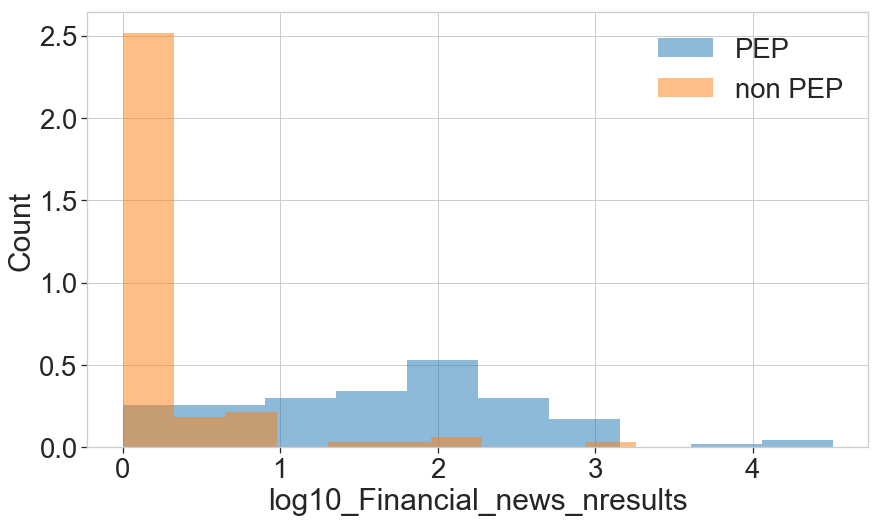

In [237]:
for i, key in enumerate(features[4:5]):
    
    print(key)
    fig, ax = plt.subplots()
    plot_hist(PEP_people_df, non_PEP_people_df, key, ax)

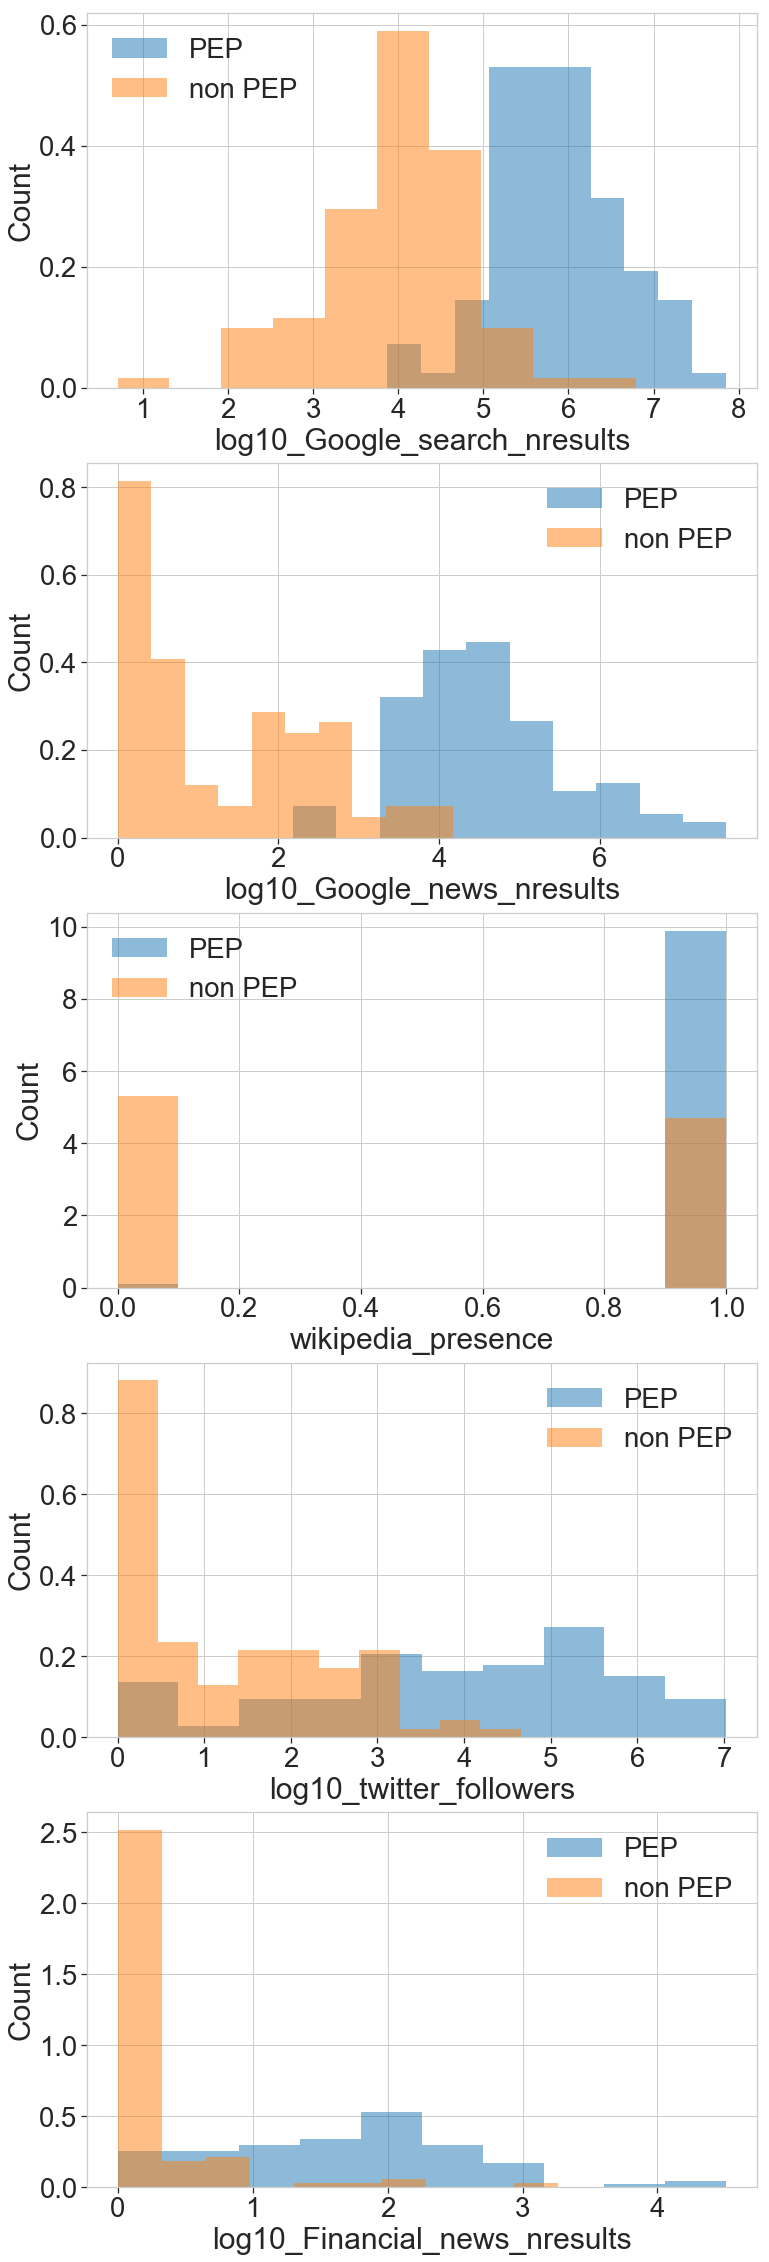

In [241]:
fig, axes = plt.subplots(5, figsize=(12, 40))

for i, key in enumerate(features):
    plot_hist(PEP_people_df, non_PEP_people_df, key, axes.flatten()[i])

### Classification

In [264]:
people = pd.concat((non_PEP_people_df, PEP_people_df))
X = people[features].values
y = people[target].values.flatten()

In [283]:
# TODO try standardization
len(X), len(y)

(204, 204)

#### Naive Bayes

In [282]:
classifier = classify(X, y, GaussianNB(), prob=0.5)

N=41, TP=21, TN=17, FP=3, FN=0
Precision: 0.8750, recall: 1.0000, accuracy: 0.9268
             precision    recall  f1-score   support

          0       1.00      0.85      0.92        20
          1       0.88      1.00      0.93        21

avg / total       0.94      0.93      0.93        41



#### Logistic regression

In [278]:
classifier = classify(X, y, LogisticRegression(), prob=0.5)

N=41, TP=21, TN=19, FP=1, FN=0
Precision: 0.9545, recall: 1.0000, accuracy: 0.9756
             precision    recall  f1-score   support

          0       1.00      0.95      0.97        20
          1       0.95      1.00      0.98        21

avg / total       0.98      0.98      0.98        41



#### Random forest

In [268]:
classifier = classify(X, y, RandomForestClassifier(random_state=20091982), prob=0.5)

N=41, TP=20, TN=20, FP=0, FN=1
Precision: 1.0000, recall: 0.9524, accuracy: 0.9756
             precision    recall  f1-score   support

          0       0.95      1.00      0.98        20
          1       1.00      0.95      0.98        21

avg / total       0.98      0.98      0.98        41



In [269]:
get_feature_importances(features, classifier.feature_importances_)

log10_Google_news_nresults: 51.43%
log10_Financial_news_nresults: 21.18%
log10_Google_search_nresults: 14.48%
log10_twitter_followers: 12.01%
wikipedia_presence: 0.89%


#### Support vector machine

In [272]:
classifier = classify(X, y, svm.SVC(probability=False), prob=None)

N=41, TP=21, TN=20, FP=0, FN=0
Precision: 1.0000, recall: 1.0000, accuracy: 1.0000
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        20
          1       1.00      1.00      1.00        21

avg / total       1.00      1.00      1.00        41



#### Neural networks

In [279]:
classifier = classify(
    X, y,
    MLPClassifier(
        hidden_layer_sizes=(200, 10), 
        learning_rate_init=0.01, 
        verbose=False), 
    prob=0.5)

N=41, TP=21, TN=20, FP=0, FN=0
Precision: 1.0000, recall: 1.0000, accuracy: 1.0000
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        20
          1       1.00      1.00      1.00        21

avg / total       1.00      1.00      1.00        41

